In [314]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [26]:
import seaborn as sns
sns.set(rc={'figure.figsize':(9,6)})

In [328]:
submissions_data = pd.read_csv('/Users/peter/Downloads/submissions_data_train 2.csv')

In [509]:
submissions_data.head()

,step_id,timestamp,submission_status,user_id,date,day
0,31971,1434349275,correct,15853,2015-06-15 04:00:48,2015-06-15
1,31972,1434348300,correct,15853,2015-06-15 04:00:48,2015-06-15
2,31972,1478852149,wrong,15853,2015-06-15 04:00:48,2015-06-15
3,31972,1478852164,correct,15853,2015-06-15 04:01:35,2015-06-15
4,31976,1434348123,wrong,15853,2015-06-15 04:01:35,2015-06-15


In [331]:
events_data = pd.read_csv('/Users/peter/Downloads/event_data_train 2.csv')

In [333]:
events_data.head()

,step_id,timestamp,action,user_id
0,32815,1434340848,viewed,17632
1,32815,1434340848,passed,17632
2,32815,1434340848,discovered,17632
3,32811,1434340895,discovered,17632
4,32811,1434340895,viewed,17632


In [334]:
events_data['date'] = pd.to_datetime(events_data.timestamp, unit = 's')

In [335]:
events_data.head()

,step_id,timestamp,action,user_id,date
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48
1,32815,1434340848,passed,17632,2015-06-15 04:00:48
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35


In [336]:
submissions_data['date'] = pd.to_datetime(events_data.timestamp, unit = 's')
submissions_data['day'] = submissions_data.date.dt.date

In [337]:
submissions_data.head()

,step_id,timestamp,submission_status,user_id,date,day
0,31971,1434349275,correct,15853,2015-06-15 04:00:48,2015-06-15
1,31972,1434348300,correct,15853,2015-06-15 04:00:48,2015-06-15
2,31972,1478852149,wrong,15853,2015-06-15 04:00:48,2015-06-15
3,31972,1478852164,correct,15853,2015-06-15 04:01:35,2015-06-15
4,31976,1434348123,wrong,15853,2015-06-15 04:01:35,2015-06-15


In [338]:
events_data.date.max()

Timestamp('2018-05-19 23:33:31')

In [339]:
events_data['day'] = events_data.date.dt.date

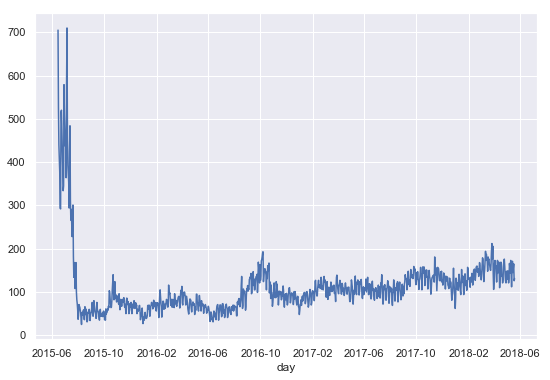

In [340]:
#Найдем сколько уникальных пользователей в день у нас было
events_data.groupby('day').user_id.nunique().plot()

In [341]:
users_events_data = events_data.pivot_table(index='user_id', \
                        columns='action', \
                        values='step_id', \
                        aggfunc='count', fill_value=0).reset_index()

In [342]:
users_events_data.head()

action,user_id,discovered,passed,started_attempt,viewed
0,1,1,0,0,1
1,2,9,9,2,10
2,3,91,87,30,192
3,5,11,11,4,12
4,7,1,1,0,1


In [343]:
users_scores = submissions_data.pivot_table(index='user_id', \
                        columns='submission_status', \
                        values='step_id', \
                        aggfunc='count', \
                        fill_value=0).reset_index()

In [344]:
users_scores.head()

submission_status,user_id,correct,wrong
0,2,2,0
1,3,29,23
2,5,2,2
3,8,9,21
4,14,0,1


In [ ]:
# Подготовим данные для гистограммы.
# Найдем сколько проходит времени от первого события для юзера до последнего события для того же юзера

In [345]:
events_data.head()

,step_id,timestamp,action,user_id,date,day
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15


In [346]:
gap_data = events_data[['timestamp','user_id','day']].drop_duplicates(subset=['user_id','day'])\
                    .groupby('user_id')['timestamp']\
                    .apply(list).apply(np.diff).values

In [347]:
gap_data = pd.Series(np.concatenate(gap_data, axis=0))

In [348]:
gap_data = gap_data / (24*3600)

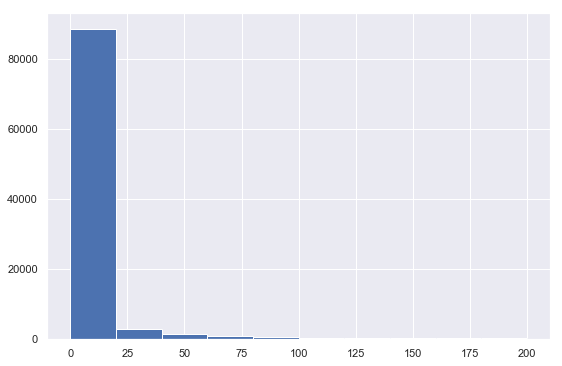

In [349]:
# gap_data.hist()
gap_data[gap_data<200].hist()

In [350]:
gap_data.quantile(0.95)

59.760440972222156

In [351]:
gap_data.quantile(0.90)

18.325995370370403

In [352]:
events_data.tail()

,step_id,timestamp,action,user_id,date,day
3480698,33375,1526772685,viewed,11677,2018-05-19 23:31:25,2018-05-19
3480699,32815,1526772750,viewed,5198,2018-05-19 23:32:30,2018-05-19
3480700,32815,1526772750,discovered,5198,2018-05-19 23:32:30,2018-05-19
3480701,32815,1526772750,passed,5198,2018-05-19 23:32:30,2018-05-19
3480702,33892,1526772811,viewed,18526,2018-05-19 23:33:31,2018-05-19


In [353]:
# Определеим порог времени для ушедшего пользователя в 30 дней между уроками (~ значение между 90 и 95 квантилем )

In [354]:
users_data = events_data.groupby('user_id', as_index = False).\
                agg({'timestamp':'max'}).rename(columns={'timestamp':'last_timestamp'})

In [355]:
users_data.head(10)

,user_id,last_timestamp
0,1,1472827464
1,2,1519226966
2,3,1444581588
3,5,1499859939
4,7,1521634660
5,8,1481466913
6,9,1484999497
7,11,1526140625
8,14,1436368676
9,16,1513162585


In [356]:
now = 1526772811
drop_out_threshhold = 2592000

In [357]:
users_data['is_gone_user'] =  (now - users_data.last_timestamp) > drop_out_threshhold

In [358]:
users_data.head()

,user_id,last_timestamp,is_gone_user
0,1,1472827464,True
1,2,1519226966,True
2,3,1444581588,True
3,5,1499859939,True
4,7,1521634660,True


In [359]:
users_data = users_data.merge(users_scores, how = 'outer')

In [360]:
users_data = users_data.fillna(0)

In [361]:
users_data.head(20)

,user_id,last_timestamp,is_gone_user,correct,wrong
0,1,1472827464,True,0.0,0.0
1,2,1519226966,True,2.0,0.0
2,3,1444581588,True,29.0,23.0
3,5,1499859939,True,2.0,2.0
4,7,1521634660,True,0.0,0.0
5,8,1481466913,True,9.0,21.0
6,9,1484999497,True,0.0,0.0
7,11,1526140625,False,0.0,0.0
8,14,1436368676,True,0.0,1.0
9,16,1513162585,True,77.0,106.0


In [362]:
users_data = users_data.merge(users_events_data, how='outer')

In [363]:
users_data.head(10)

,user_id,last_timestamp,is_gone_user,correct,wrong,discovered,passed,started_attempt,viewed
0,1,1472827464,True,0.0,0.0,1,0,0,1
1,2,1519226966,True,2.0,0.0,9,9,2,10
2,3,1444581588,True,29.0,23.0,91,87,30,192
3,5,1499859939,True,2.0,2.0,11,11,4,12
4,7,1521634660,True,0.0,0.0,1,1,0,1
5,8,1481466913,True,9.0,21.0,109,84,37,156
6,9,1484999497,True,0.0,0.0,3,3,0,4
7,11,1526140625,False,0.0,0.0,1,0,1,1
8,14,1436368676,True,0.0,1.0,4,3,1,9
9,16,1513162585,True,77.0,106.0,196,196,108,651


In [364]:
events_data.head()

,step_id,timestamp,action,user_id,date,day
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15


In [365]:
users_days = events_data.groupby('user_id').day.nunique().to_frame().reset_index()

In [366]:
users_days.head(20)

,user_id,day
0,1,1
1,2,2
2,3,7
3,5,2
4,7,1
5,8,2
6,9,1
7,11,1
8,14,1
9,16,21


In [276]:
users_days.shape

(19234, 2)

In [277]:
users_data.shape

(19234, 9)

In [367]:
users_data = users_data.merge(users_days, on = 'user_id', how='inner')

In [368]:
users_data.head(10)

,user_id,last_timestamp,is_gone_user,correct,wrong,discovered,passed,started_attempt,viewed,day
0,1,1472827464,True,0.0,0.0,1,0,0,1,1
1,2,1519226966,True,2.0,0.0,9,9,2,10,2
2,3,1444581588,True,29.0,23.0,91,87,30,192,7
3,5,1499859939,True,2.0,2.0,11,11,4,12,2
4,7,1521634660,True,0.0,0.0,1,1,0,1,1
5,8,1481466913,True,9.0,21.0,109,84,37,156,2
6,9,1484999497,True,0.0,0.0,3,3,0,4,1
7,11,1526140625,False,0.0,0.0,1,0,1,1,1
8,14,1436368676,True,0.0,1.0,4,3,1,9,1
9,16,1513162585,True,77.0,106.0,196,196,108,651,21


In [285]:
users_data.user_id.nunique()

19234

In [287]:
events_data.user_id.nunique()

19234

In [376]:
users_data['pass_course'] = users_data.passed > 170

In [377]:
#Сравним количество прошедших и не прошедших курс
users_data.groupby('pass_course').count().reset_index()[['pass_course','day']]

,pass_course,day
0,False,17809
1,True,1425


In [311]:
users_data.corr()

,user_id,last_timestamp,is_gone_user,correct,wrong,discovered,passed,started_attempt,viewed,day,pass_course
user_id,1.000000,0.000891,0.005833,-0.007741,-0.009645,-0.003736,-0.005336,-0.008046,-0.001114,-0.006002,-0.013831
last_timestamp,0.000891,1.000000,-0.372757,0.147896,0.144588,0.158777,0.157022,0.172967,0.098883,0.165761,0.085717
is_gone_user,0.005833,-0.372757,1.000000,-0.093813,-0.099727,-0.096667,-0.095149,-0.113000,-0.072170,-0.124904,-0.029146
correct,-0.007741,0.147896,-0.093813,1.000000,0.676655,0.942966,0.964260,0.948728,0.452116,0.586093,0.828590
wrong,-0.009645,0.144588,-0.099727,0.676655,1.000000,0.659209,0.664214,0.759562,0.396385,0.476626,0.549764
discovered,-0.003736,0.158777,-0.096667,0.942966,0.659209,1.000000,0.995239,0.923218,0.485658,0.580338,0.791198
passed,-0.005336,0.157022,-0.095149,0.964260,0.664214,0.995239,1.000000,0.931347,0.470482,0.576248,0.818068
started_attempt,-0.008046,0.172967,-0.113000,0.948728,0.759562,0.923218,0.931347,1.000000,0.500799,0.613939,0.778952
viewed,-0.001114,0.098883,-0.072170,0.452116,0.396385,0.485658,0.470482,0.500799,1.000000,0.589070,0.370765
day,-0.006002,0.165761,-0.124904,0.586093,0.476626,0.580338,0.576248,0.613939,0.589070,1.000000,0.437901


In [591]:
users_data.head()

,user_id,last_timestamp,is_gone_user,correct,wrong,discovered,passed,started_attempt,viewed,day,pass_course,min_timestamp
0,1,1472827464,True,0.0,0.0,1,0,0,1,1,False,1472827464
1,2,1519226966,True,2.0,0.0,9,9,2,10,2,False,1514383364
2,3,1444581588,True,29.0,23.0,91,87,30,192,7,False,1434358476
3,5,1499859939,True,2.0,2.0,11,11,4,12,2,False,1466156809
4,7,1521634660,True,0.0,0.0,1,1,0,1,1,False,1521634660


In [373]:
users_data.corr()

,user_id,last_timestamp,is_gone_user,correct,wrong,discovered,passed,started_attempt,viewed,day
user_id,1.000000,0.000891,0.005833,-0.007741,-0.009645,-0.003736,-0.005336,-0.008046,-0.001114,-0.006002
last_timestamp,0.000891,1.000000,-0.372757,0.147896,0.144588,0.158777,0.157022,0.172967,0.098883,0.165761
is_gone_user,0.005833,-0.372757,1.000000,-0.093813,-0.099727,-0.096667,-0.095149,-0.113000,-0.072170,-0.124904
correct,-0.007741,0.147896,-0.093813,1.000000,0.676655,0.942966,0.964260,0.948728,0.452116,0.586093
wrong,-0.009645,0.144588,-0.099727,0.676655,1.000000,0.659209,0.664214,0.759562,0.396385,0.476626
discovered,-0.003736,0.158777,-0.096667,0.942966,0.659209,1.000000,0.995239,0.923218,0.485658,0.580338
passed,-0.005336,0.157022,-0.095149,0.964260,0.664214,0.995239,1.000000,0.931347,0.470482,0.576248
started_attempt,-0.008046,0.172967,-0.113000,0.948728,0.759562,0.923218,0.931347,1.000000,0.500799,0.613939
viewed,-0.001114,0.098883,-0.072170,0.452116,0.396385,0.485658,0.470482,0.500799,1.000000,0.589070
day,-0.006002,0.165761,-0.124904,0.586093,0.476626,0.580338,0.576248,0.613939,0.589070,1.000000


In [379]:
users_data[users_data.pass_course].day.median()

20.0

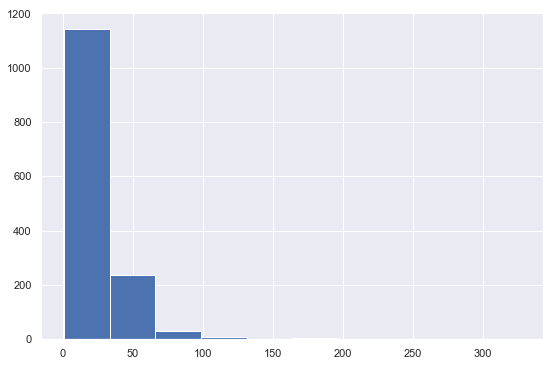

In [380]:
users_data[users_data.pass_course].day.hist()

In [391]:
user_min_time = events_data.groupby('user_id', as_index = False).agg({'timestamp':'min'}).rename({'timestamp':'min_timestamp'}, axis=1)

In [392]:
user_min_time.head()

,user_id,min_timestamp
0,1,1472827464
1,2,1514383364
2,3,1434358476
3,5,1466156809
4,7,1521634660


In [393]:
users_data = users_data.merge(user_min_time, how='outer')

In [394]:
users_data.head()

,user_id,last_timestamp,is_gone_user,correct,wrong,discovered,passed,started_attempt,viewed,day,pass_course,min_timestamp
0,1,1472827464,True,0.0,0.0,1,0,0,1,1,False,1472827464
1,2,1519226966,True,2.0,0.0,9,9,2,10,2,False,1514383364
2,3,1444581588,True,29.0,23.0,91,87,30,192,7,False,1434358476
3,5,1499859939,True,2.0,2.0,11,11,4,12,2,False,1466156809
4,7,1521634660,True,0.0,0.0,1,1,0,1,1,False,1521634660


In [412]:
s = events_data.merge(user_min_time, how='outer').\
            query("timestamp <= min_timestamp + 3 * 24 * 60* 60").\
            drop('min_timestamp', axis=1)

In [413]:
s.query("user_id == 1")

,step_id,timestamp,action,user_id,date,day
1596008,31981,1472827464,viewed,1,2016-09-02 14:44:24,2016-09-02
1596009,31981,1472827464,discovered,1,2016-09-02 14:44:24,2016-09-02


In [414]:
events_data['user_time'] = events_data.user_id.map(str) + '_' + events_data.timestamp.map(str)

In [415]:
events_data.head()

,step_id,timestamp,action,user_id,date,day,user_time
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15,17632_1434340848
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15,17632_1434340848
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15,17632_1434340848
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15,17632_1434340895
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15,17632_1434340895


In [421]:
learning_time_threshold = 3*24*3600

In [425]:
user_learning_time_threshold = user_min_time.user_id.map(str) + '_' + (user_min_time.min_timestamp + 
                                                                       learning_time_threshold).map(str)

In [424]:
user_learning_time_shreshold.head()

0    1_1473086664
1    2_1514642564
2    3_1434617676
3    5_1466416009
4    7_1521893860
dtype: object

In [427]:
user_min_time['user_learning_time_threshold'] = user_learning_time_threshold

In [428]:
user_min_time.head()

,user_id,min_timestamp,user_learning_time_threshold
0,1,1472827464,1_1473086664
1,2,1514383364,2_1514642564
2,3,1434358476,3_1434617676
3,5,1466156809,5_1466416009
4,7,1521634660,7_1521893860


In [437]:
events_data = events_data.merge(user_min_time[['user_id','user_learning_time_threshold']], how ='outer')

AttributeError: 'tuple' object has no attribute 'merge'

In [438]:
events_data

(3480703, 8)

In [436]:
events_data[events_data.user_time <= events_data.user_learning_time_threshold]

AttributeError: 'tuple' object has no attribute 'user_time'

In [490]:
events_data_train = s

In [582]:
events_data_train.head()

,step_id,timestamp,action,user_id,date,day
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15


В процессе решения одной аналитической задачи очень часто замечаешь и другие задачи, связанные с исследуемым вопросом. В свое время, работая над предсказанием оттока студентов со stepik, я многое изменил в структуре своих курсов. 

Тогда я нашел довольно интересную закономерность прохождения онлайн курсов. Слушатели онлайн курсов очень негативно реагируют на невозможность решить задачу, иными словами, если студент застрял на определенном шаге, то он, с высокой вероятность, вообще бросит курс, чем просто пропустит этот шаг и продолжит обучение. 

Давайте найдем такой стэп, используя данные о сабмитах. Для каждого пользователя найдите такой шаг, который он не смог решить, и после этого не пытался решать другие шаги. Затем найдите id шага,  который стал финальной точкой практического обучения на курсе для максимального числа пользователей. 

То есть мы исследуем следующий сценарий: человек решает стэп, не может получить правильный ответ и больше не возвращается к практическим задачам. Что это за шаг такой, который отпугнул максимальное число пользователей?

In [449]:
dfs = pd.read_csv('/Users/peter/Downloads/submissions_data_train 2.csv')

In [459]:
max_timestamp_dfs = dfs.groupby('user_id', as_index=False).agg({'timestamp':'max'}).\
                                rename(columns={'timestamp':'max_timestamp'})

In [462]:
dfs = dfs.merge(max_timestamp_dfs, how='outer')

In [463]:
dfs.head()

,step_id,timestamp,submission_status,user_id,max_timestamp
0,31971,1434349275,correct,15853,1479734163
1,31972,1434348300,correct,15853,1479734163
2,31972,1478852149,wrong,15853,1479734163
3,31972,1478852164,correct,15853,1479734163
4,31976,1434348123,wrong,15853,1479734163


In [473]:
dfs_new = dfs.query("timestamp == max_timestamp & submission_status == 'wrong'")

In [489]:
#dfs_new.groupby('step_id',as_index=False).count().query("timestamp == 154")
dfs_new.query("timestamp == 154")

,step_id,timestamp,submission_status,user_id,max_timestamp
4,31978,154,154,154,154


In [493]:
submissions_data.head()

,step_id,timestamp,submission_status,user_id,date,day
0,31971,1434349275,correct,15853,2015-06-15 04:00:48,2015-06-15
1,31972,1434348300,correct,15853,2015-06-15 04:00:48,2015-06-15
2,31972,1478852149,wrong,15853,2015-06-15 04:00:48,2015-06-15
3,31972,1478852164,correct,15853,2015-06-15 04:01:35,2015-06-15
4,31976,1434348123,wrong,15853,2015-06-15 04:01:35,2015-06-15


In [499]:
user_min_time = user_min_time.drop(['user_learning_time_threshold'], axis=1)

In [508]:
submissions_data_train.head()

,step_id,timestamp,submission_status,user_id,date,day,min_timestamp
0,31971.0,1.434349e+09,correct,15853,2015-06-15 04:00:48,2015-06-15,1434345977
1,31972.0,1.434348e+09,correct,15853,2015-06-15 04:00:48,2015-06-15,1434345977
2,31972.0,1.478852e+09,wrong,15853,2015-06-15 04:00:48,2015-06-15,1434345977
3,31972.0,1.478852e+09,correct,15853,2015-06-15 04:01:35,2015-06-15,1434345977
4,31976.0,1.434348e+09,wrong,15853,2015-06-15 04:01:35,2015-06-15,1434345977


In [523]:
user_min_time.head(19)

,user_id,min_timestamp
0,1,1472827464
1,2,1514383364
2,3,1434358476
3,5,1466156809
4,7,1521634660
5,8,1480603427
6,9,1484999434
7,11,1526140624
8,14,1436366155
9,16,1435674765


In [541]:
submissions_data_train = pd.read_csv('/Users/peter/Downloads/submissions_data_train 2.csv')

In [542]:
submissions_data_train.head()

,step_id,timestamp,submission_status,user_id
0,31971,1434349275,correct,15853
1,31972,1434348300,correct,15853
2,31972,1478852149,wrong,15853
3,31972,1478852164,correct,15853
4,31976,1434348123,wrong,15853


In [545]:
submissions_data_train = submissions_data_train.merge(user_min_time_submissions, how='outer', on='user_id')

In [546]:
submissions_data_train.head()

,step_id,timestamp,submission_status,user_id,min_timestamp
0,31971,1434349275,correct,15853,1434346056
1,31972,1434348300,correct,15853,1434346056
2,31972,1478852149,wrong,15853,1434346056
3,31972,1478852164,correct,15853,1434346056
4,31976,1434348123,wrong,15853,1434346056


In [543]:
user_min_time_submissions = submissions_data_train.groupby('user_id', as_index = False).\
        agg({'timestamp':'min'}).rename({'timestamp':'min_timestamp'}, axis=1)

In [544]:
user_min_time_submissions.head()

,user_id,min_timestamp
0,2,1514383420
1,3,1434358533
2,5,1499859650
3,8,1480603432
4,14,1436368601


In [547]:
submissions_data_train = submissions_data_train.query("timestamp <= min_timestamp + 3 * 24 * 60* 60").\
            drop('min_timestamp', axis=1)

In [554]:
submissions_data_train.head()

,step_id,timestamp,submission_status,user_id,date,day
0,31971,1434349275,correct,15853,2015-06-15 06:21:15,2015-06-15
1,31972,1434348300,correct,15853,2015-06-15 06:05:00,2015-06-15
4,31976,1434348123,wrong,15853,2015-06-15 06:02:03,2015-06-15
5,31976,1434348188,correct,15853,2015-06-15 06:03:08,2015-06-15
7,31977,1434347371,correct,15853,2015-06-15 05:49:31,2015-06-15


In [553]:
submissions_data_train['date'] = pd.to_datetime(submissions_data_train.timestamp, unit = 's')
submissions_data_train['day'] = submissions_data_train.date.dt.date

In [559]:
X = submissions_data_train.groupby('user_id').day.nunique().to_frame().reset_index()

In [557]:
X.head(15)

,user_id,day
0,2,1
1,3,1
2,5,1
3,8,1
4,14,1
5,16,3
6,17,1
7,22,3
8,25,1
9,26,1


In [562]:
steps_tried = submissions_data_train.groupby('user_id').step_id.nunique().to_frame().reset_index()\
    .rename(columns={'step_id':'steps_tried'})

In [563]:
steps_tried.head()

,user_id,steps_tried
0,2,2
1,3,4
2,5,2
3,8,11
4,14,1


In [564]:
X = X.merge(steps_tried, on='user_id', how='outer')

In [565]:
X.head()

,user_id,day,steps_tried
0,2,1,2
1,3,1,4
2,5,1,2
3,8,1,11
4,14,1,1


In [570]:
X = X.rename(columns={'day':'days'})

In [572]:
X.head(10)

,user_id,days,steps_tried
0,2,1,2
1,3,1,4
2,5,1,2
3,8,1,11
4,14,1,1
5,16,3,23
6,17,1,1
7,22,3,20
8,25,1,2
9,26,1,7


In [574]:
X = X.merge(submissions_data_train.pivot_table(index='user_id', \
                        columns='submission_status', \
                        values='step_id', \
                        aggfunc='count', \
                        fill_value=0).reset_index())

In [575]:
X.head()

,user_id,days,steps_tried,correct,wrong
0,2,1,2,2,0
1,3,1,4,4,4
2,5,1,2,2,2
3,8,1,11,9,21
4,14,1,1,0,1


In [578]:
X['correct_ratio'] = X.correct / (X.correct + X.wrong)

In [579]:
X.head()

,user_id,days,steps_tried,correct,wrong,correct_ratio
0,2,1,2,2,0,1.0
1,3,1,4,4,4,0.5
2,5,1,2,2,2,0.5
3,8,1,11,9,21,0.3
4,14,1,1,0,1,0.0


In [584]:
X = X.merge(events_data_train.\
            pivot_table(index = 'user_id', columns ='action', values = 'step_id', aggfunc = 'count', fill_value=0).\
            reset_index()[['user_id','viewed']], how='outer')

In [585]:
X.head()

,user_id,days,steps_tried,correct,wrong,correct_ratio,viewed
0,2,1.0,2.0,2.0,0.0,1.0,9
1,3,1.0,4.0,4.0,4.0,0.5,20
2,5,1.0,2.0,2.0,2.0,0.5,1
3,8,1.0,11.0,9.0,21.0,0.3,154
4,14,1.0,1.0,0.0,1.0,0.0,9


In [586]:
X.shape

(19234, 7)

In [587]:
X = X.fillna(0)

In [594]:
X.head()

,user_id,days,steps_tried,correct,wrong,correct_ratio,viewed
0,2,1.0,2.0,2.0,0.0,1.0,9
1,3,1.0,4.0,4.0,4.0,0.5,20
2,5,1.0,2.0,2.0,2.0,0.5,1
3,8,1.0,11.0,9.0,21.0,0.3,154
4,14,1.0,1.0,0.0,1.0,0.0,9


In [593]:
users_data.head()

,user_id,last_timestamp,is_gone_user,correct,wrong,discovered,passed,started_attempt,viewed,day,pass_course,min_timestamp
0,1,1472827464,True,0.0,0.0,1,0,0,1,1,False,1472827464
1,2,1519226966,True,2.0,0.0,9,9,2,10,2,False,1514383364
2,3,1444581588,True,29.0,23.0,91,87,30,192,7,False,1434358476
3,5,1499859939,True,2.0,2.0,11,11,4,12,2,False,1466156809
4,7,1521634660,True,0.0,0.0,1,1,0,1,1,False,1521634660


In [597]:
X = X.merge(users_data[['user_id','pass_course','is_gone_user']], how='outer', on='user_id')

In [598]:
X.head()

,user_id,days,steps_tried,correct,wrong,correct_ratio,viewed,pass_course,is_gone_user
0,2,1.0,2.0,2.0,0.0,1.0,9,False,True
1,3,1.0,4.0,4.0,4.0,0.5,20,False,True
2,5,1.0,2.0,2.0,2.0,0.5,1,False,True
3,8,1.0,11.0,9.0,21.0,0.3,154,False,True
4,14,1.0,1.0,0.0,1.0,0.0,9,False,True


In [609]:
X = X[~((X.is_gone_user == False) & (X.pass_course == False))]

In [610]:
X.groupby(['pass_course','is_gone_user']).user_id.count()

pass_course  is_gone_user
False        True            16560
True         False             141
             True             1284
Name: user_id, dtype: int64

In [628]:
y = y.to_frame().pass_course.map(int)

In [612]:
X = X.drop(['pass_course','is_gone_user'], axis=1)

In [630]:
y.head(10)

0     0
1     0
2     0
3     0
4     0
5     1
6     0
7     1
9     0
10    1
Name: pass_course, dtype: int64

In [617]:
X.head()

,user_id,days,steps_tried,correct,wrong,correct_ratio,viewed
0,2,1.0,2.0,2.0,0.0,1.0,9
1,3,1.0,4.0,4.0,4.0,0.5,20
2,5,1.0,2.0,2.0,2.0,0.5,1
3,8,1.0,11.0,9.0,21.0,0.3,154
4,14,1.0,1.0,0.0,1.0,0.0,9


In [618]:
X = X.set_index(X.user_id)

In [624]:
X = X.drop('user_id', axis = 1)
X.head()

,days,steps_tried,correct,wrong,correct_ratio,viewed
user_id,,,,,,
2,1.0,2.0,2.0,0.0,1.0,9
3,1.0,4.0,4.0,4.0,0.5,20
5,1.0,2.0,2.0,2.0,0.5,1
8,1.0,11.0,9.0,21.0,0.3,154
14,1.0,1.0,0.0,1.0,0.0,9


In [621]:
X.head()

,user_id,days,steps_tried,correct,wrong,correct_ratio,viewed
user_id,,,,,,,
2,2,1.0,2.0,2.0,0.0,1.0,9
3,3,1.0,4.0,4.0,4.0,0.5,20
5,5,1.0,2.0,2.0,2.0,0.5,1
8,8,1.0,11.0,9.0,21.0,0.3,154
14,14,1.0,1.0,0.0,1.0,0.0,9
